# Visualization with visualization specification file


As described in the [PEtab documentation](https://petab.readthedocs.io/en/latest/documentation_data_format.html), the visualization specification file (VS) is a tab-separated value file containing the specification of the visualization routines which come with the PEtab repository. In this example, we will  discuss how to specify different visualization settings by means of the VS.

Let's plot measurements corresponding to the ones of the models from the Benchmark collection [Fujita_SciSignal2010](https://github.com/Benchmarking-Initiative/Benchmark-Models-PEtab/tree/master/Benchmark-Models/Fujita_SciSignal2010).

In [1]:
import petab
from petab.visualize import plot_data_and_simulation

folder = "example_Fujita/"
data_file_path = folder + "Fujita_measurementData.tsv"
condition_file_path = folder + "Fujita_experimentalCondition.tsv"
observables_file_path = folder + "Fujita_observables.tsv"

If no settings are provided, the measurements will be plotted with default settings. Namely, it will be assumed that the independent variable is time, and that data for each observable is to be plotted in a separate subplot. This also applies to the case when VS is empty:

/home/dweindl/src/libpetab-python/petab/core.py:59: UserWarning: Visualization table is empty. Defaults will be used. Refer to the documentation for details.
  warn("Visualization table is empty. Defaults will be used. "


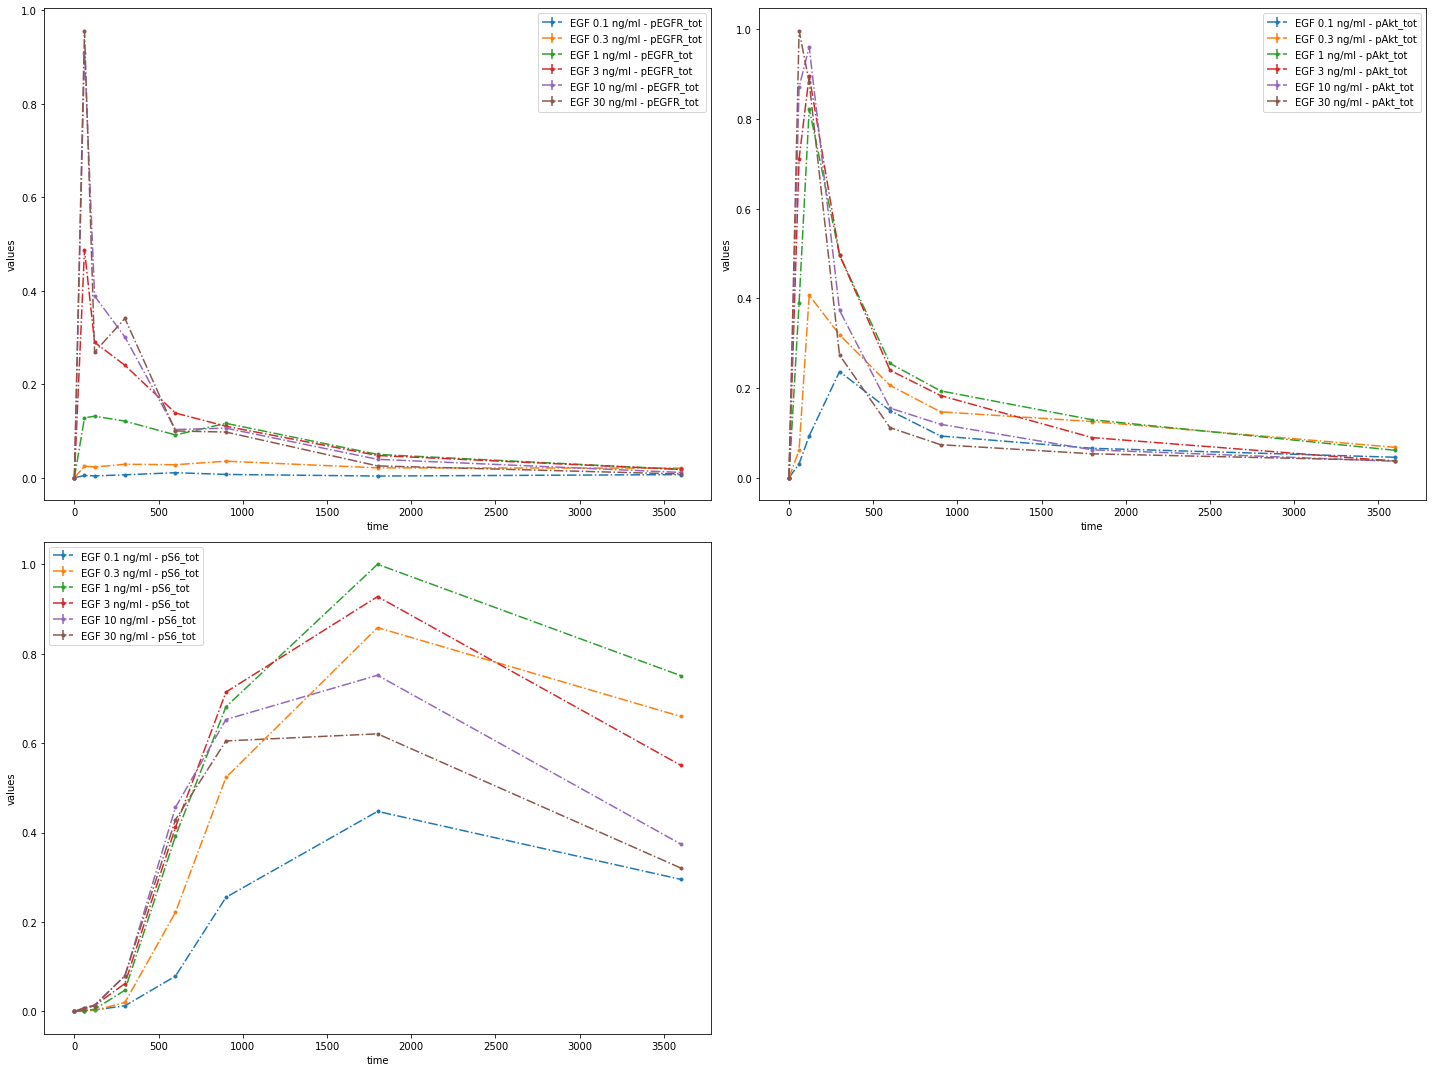

In [2]:
visualization_file_path = folder + "/visuSpecs/Fujita_visuSpec_empty.tsv"

pp = petab.Problem.from_files(measurement_file=data_file_path,
                              condition_file=condition_file_path,
                              observable_files=observables_file_path,
                              visualization_files=visualization_file_path)
petab.visualize.plot_problem(petab_problem=pp);

First of all, let us create a visualization specification file with only mandatory columns. In fact, there is only  one mandatory column: `plotId`.
Resulting plot using the VS

| plotId |
|---|
| plot1 |

is the same as before:

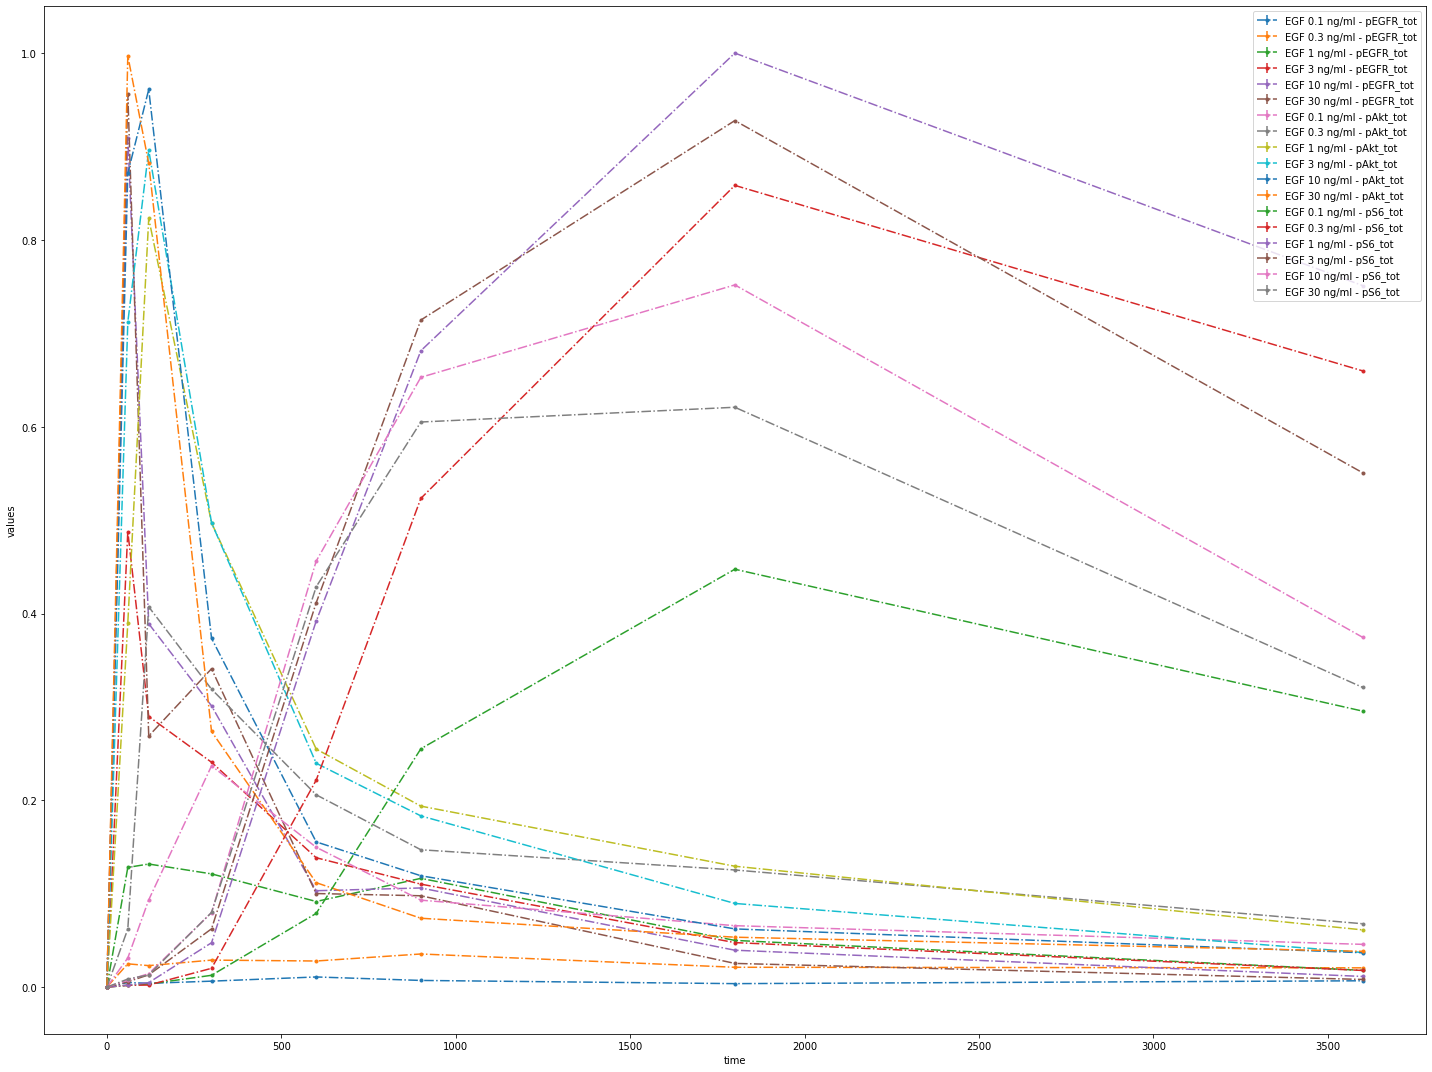

In [3]:
visualization_file_path = folder + "/visuSpecs/Fujita_visuSpec_mandatory.tsv"

pp = petab.Problem.from_files(measurement_file=data_file_path,
                              condition_file=condition_file_path,
                              observable_files=observables_file_path,
                              visualization_files=visualization_file_path)

petab.visualize.plot_problem(petab_problem=pp);

Now let's try adding some settings:

| plotId |  xOffset | yScale |
|---|---|---|
| plot1 | 100 | log |


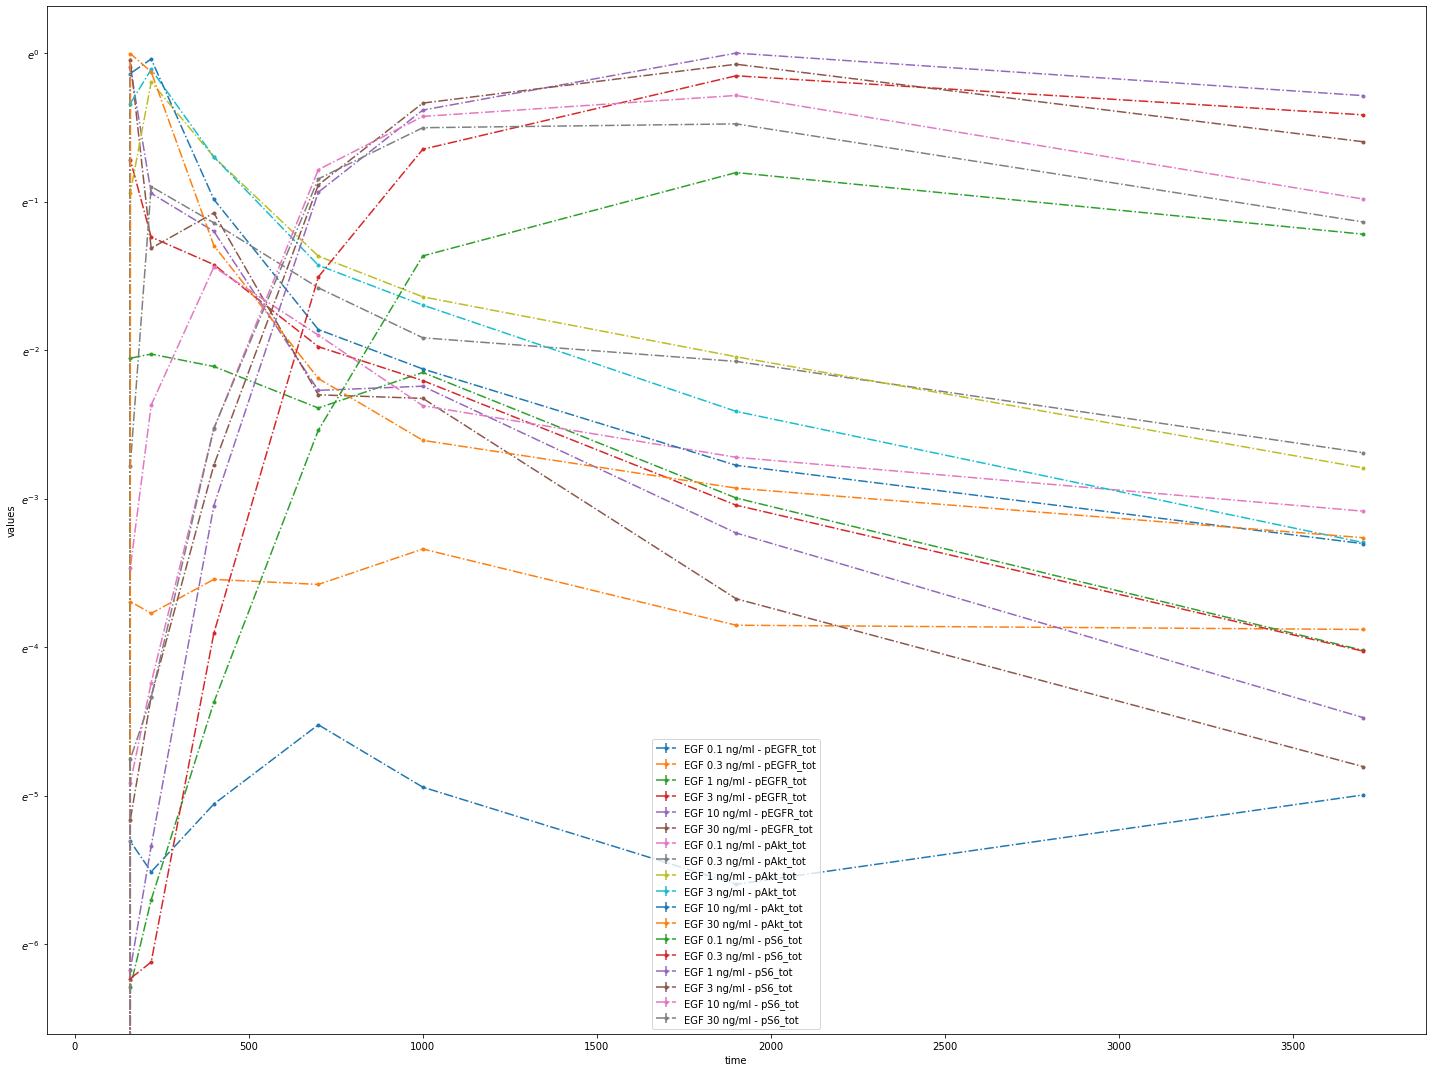

In [4]:
visualization_file_path = folder + "/visuSpecs/Fujita_visuSpec_1.tsv"

pp = petab.Problem.from_files(measurement_file=data_file_path,
                              condition_file=condition_file_path,
                              observable_files=observables_file_path,
                              visualization_files=visualization_file_path)

petab.visualize.plot_problem(petab_problem=pp);

As you can see, the scale of the y-axis changed to a logarithmic one and an offset for the independent variable is set to 100.

You can group measurements by observables by adding `yValues` column:

| plotId | yValues | yOffset | yScale | plotName |
|---|---|---|---|---|
| plot1 | pEGFR_tot | 0 | log | pEGFR total |
| plot2 | pAkt_tot | 300 | lin | pAkt total and pS6 total|
| plot2 | pS6_tot | 305 | lin | pAkt total and pS6 total |


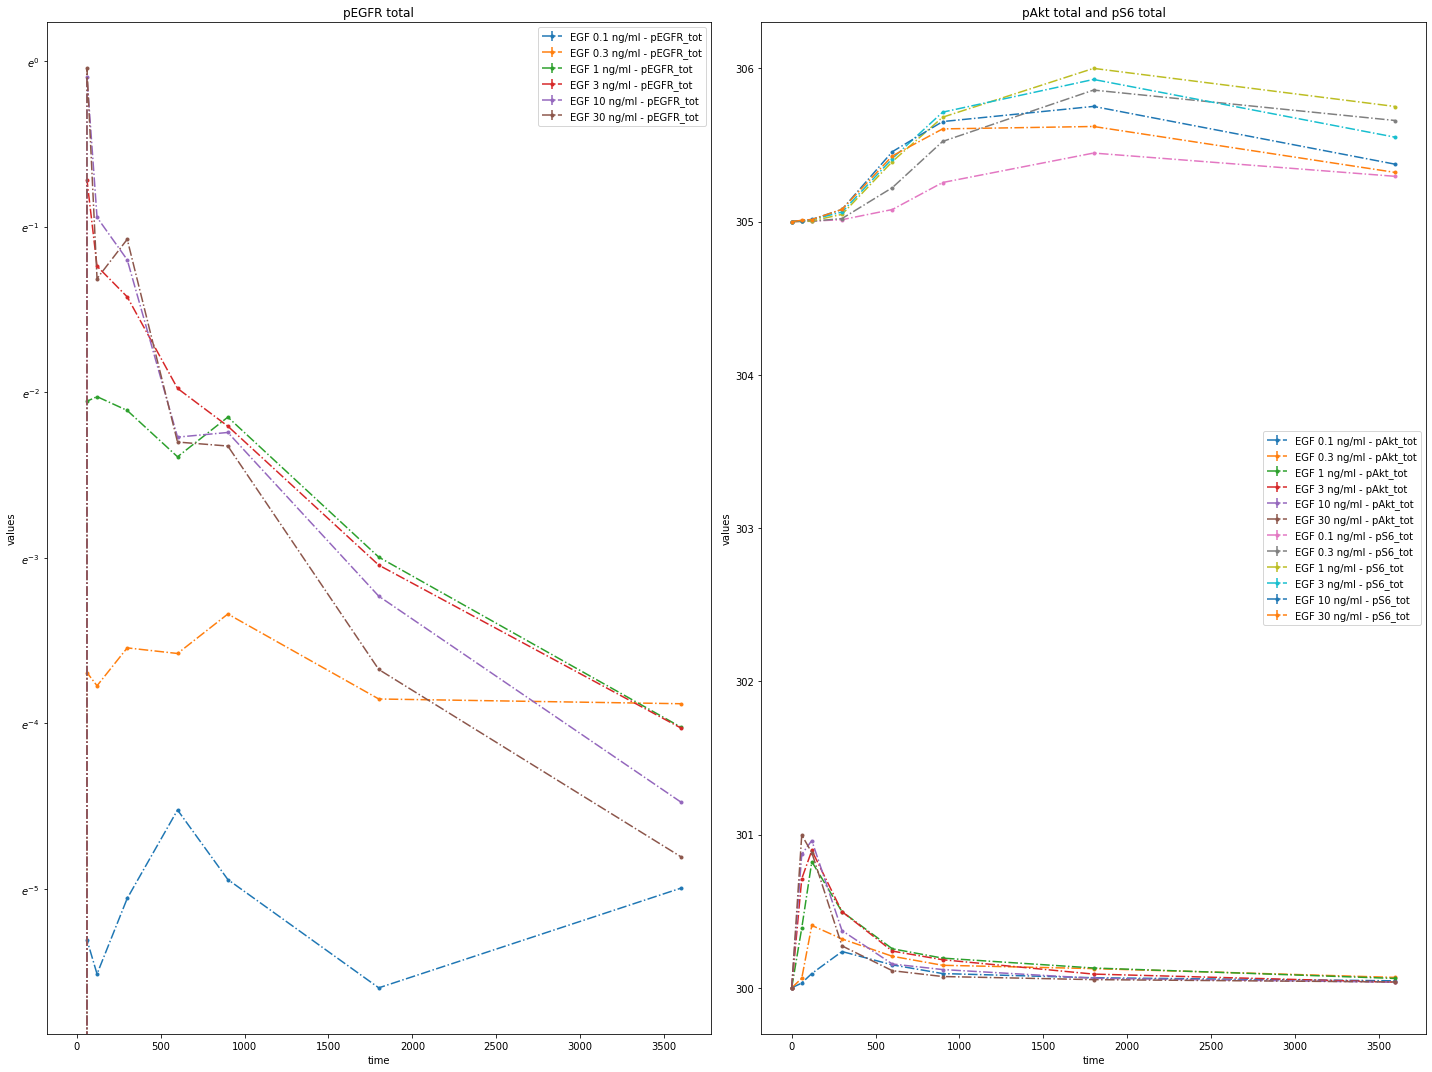

In [5]:
visualization_file_path = folder + "/visuSpecs/Fujita_visuSpec_2.tsv"

pp = petab.Problem.from_files(measurement_file=data_file_path,
                              condition_file=condition_file_path,
                              observable_files=observables_file_path,
                              visualization_files=visualization_file_path)

petab.visualize.plot_problem(petab_problem=pp);

You can also plot individual datasets:

| plotId |	plotTypeSimulation | plotTypeData |	datasetId |	xValues |
|---|---|---|---|---|
| plot1	| LinePlot | provided | model1_data1_pEGFR_tot | time |
| plot2	| LinePlot | provided | model1_data2_pEGFR_tot | time |
| plot2	| LinePlot | provided | model1_data3_pEGFR_tot | time |
| plot3	| LinePlot | provided | model1_data4_pEGFR_tot | time |
| plot3	| LinePlot | provided | model1_data5_pEGFR_tot | time |
| plot3	| LinePlot | provided | model1_data6_pEGFR_tot | time |

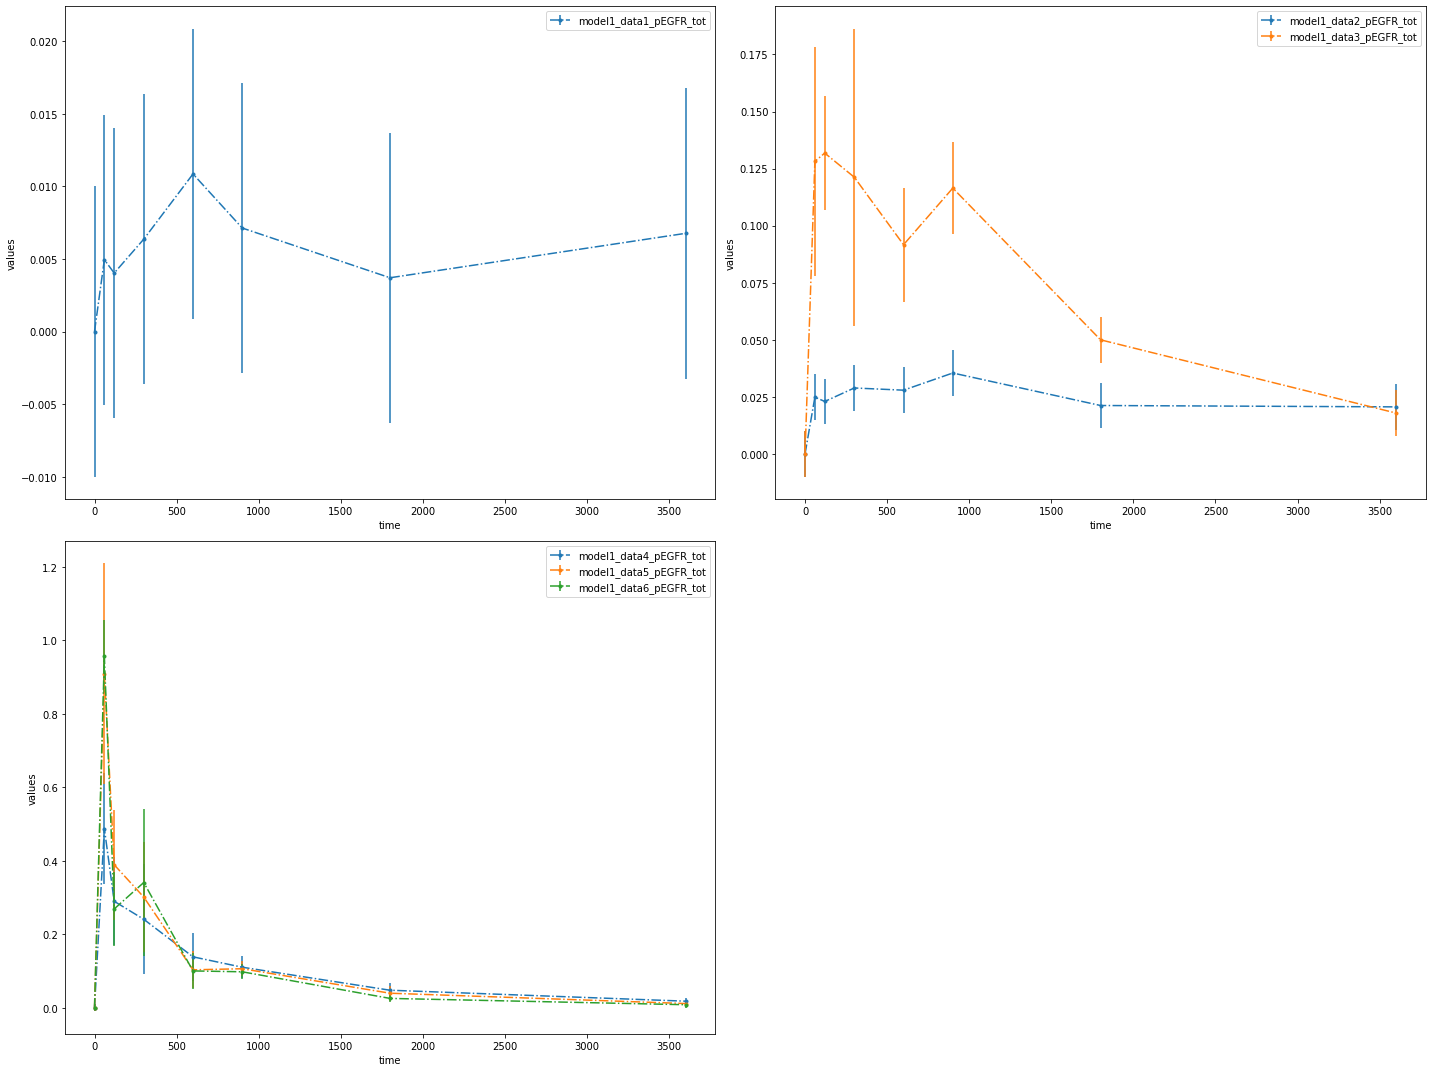

In [6]:
visualization_file_path = folder + "/visuSpecs/Fujita_visuSpec_individual_datasets.tsv"

pp = petab.Problem.from_files(measurement_file=data_file_path,
                              condition_file=condition_file_path,
                              observable_files=observables_file_path,
                              visualization_files=visualization_file_path)

petab.visualize.plot_problem(petab_problem=pp);

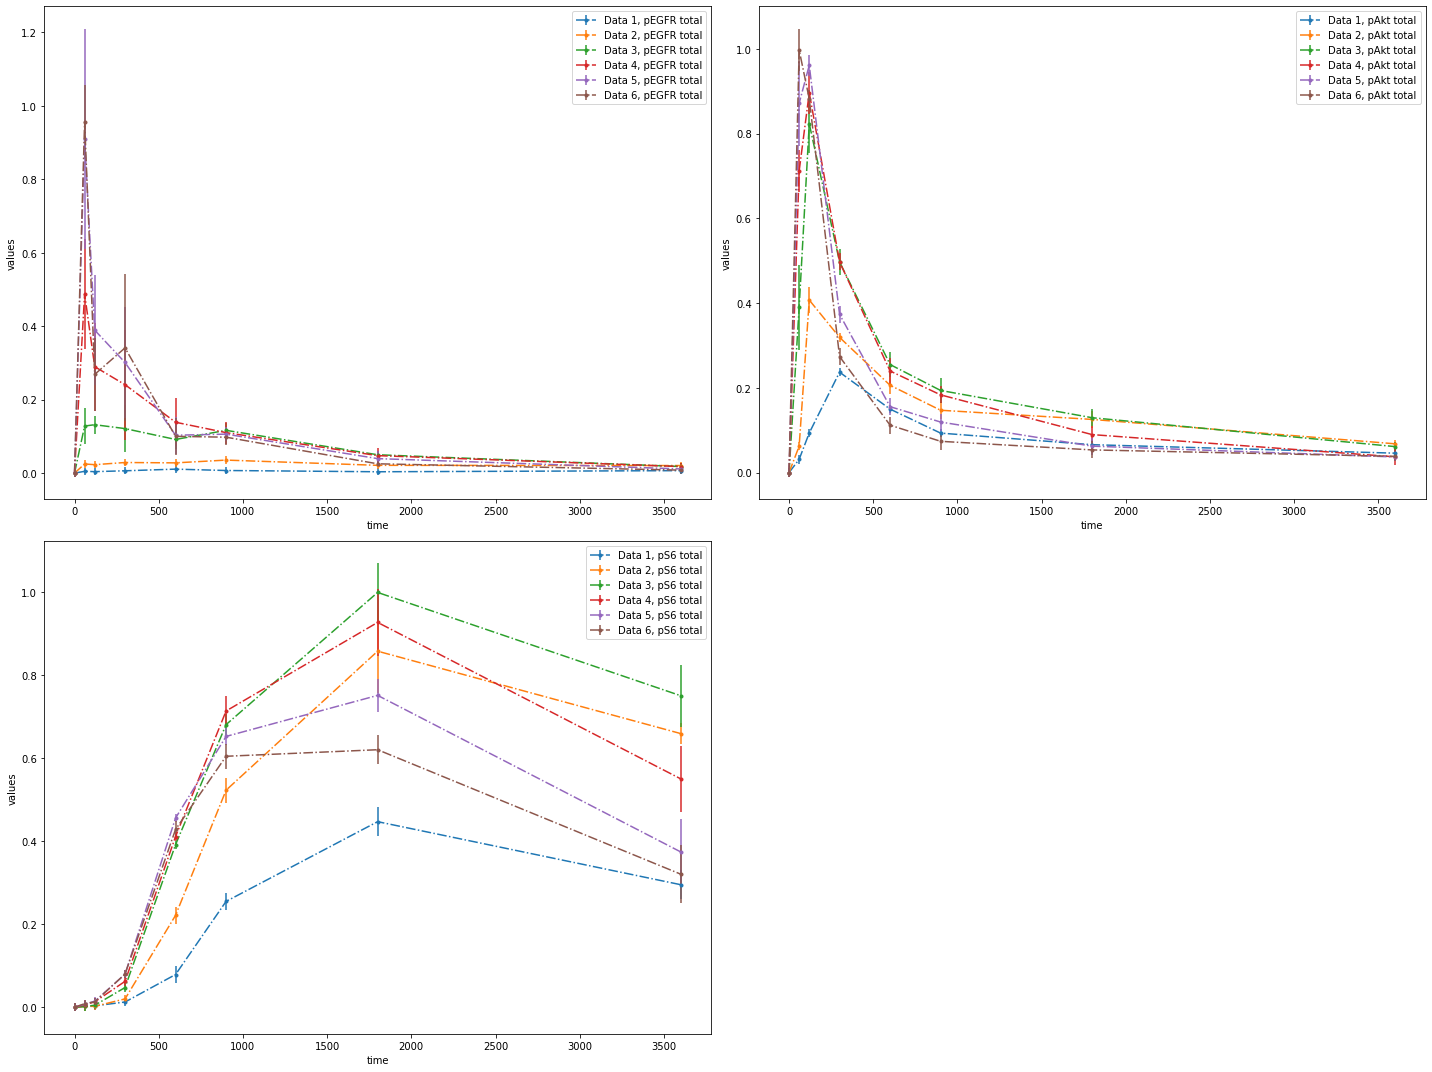

In [7]:
visualization_file_path = folder + "/visuSpecs/Fujita_visuSpec_datasetIds.tsv"

pp = petab.Problem.from_files(measurement_file=data_file_path,
                              condition_file=condition_file_path,
                              observable_files=observables_file_path,
                              visualization_files=visualization_file_path)

petab.visualize.plot_problem(petab_problem=pp);

As you can see, with the VS file you have an opportunity to plot each dataset individually or groups of datasets. Refer to the [PEtab documentation](https://petab.readthedocs.io/en/latest/documentation_data_format.html) for descriptions of all possible settings. If you have any questions or encounter some problems, please create an issue. We will be happy to help!